# Introduction to data science - Python

2019-08-27

In [1]:
# Import libaries
import os
import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Designate input data
INDIR = "data/"
datafile = "modc_ae_2012.txt"
datafile_ave = "ave_log2_modc_ae_2012.txt"

In [2]:
X = [18.7103, 19.5864, 19.0913, 19.6176, 18.3535, 19.3708, 19.2411, 18.7447, 19.6554, 20.1722, 18.7621, 19.4203, 19.8431, 19.6063, 19.1312, 19.6309, 19.3373, 18.22, 19.167, 19.1908, 19.9454, 19.4662, 19.8465, 19.4658, 18.445, 19.7141, 18.8511, 18.831, 18.3799, 19.7284, 19.8314, 19.4222, 18.7622, 20.4409, 19.1529, 17.7998, 19.0078, 19.2157, 18.947, 19.5418, 19.9454, 19.6346, 18.4007, 19.127, 17.8615, 18.8835, 19.8252, 18.9186, 18.5735, 19.5492, 19.7822, 19.5076, 18.5093, 21.0646, 19.5701, 19.6512, 19.9295, 19.5274, 19.092, 16.7209, 19.1276, 18.1139, 19.4628, 19.7718, 19.301, 18.7855, 19.5914, 19.0588, 19.1228, 19.0519, 18.7518, 19.5578, 19.7133, 18.6093, 19.0295, 19.9849, 19.8133, 19.3702, 18.992, 19.5448, 19.4255, 19.383, 18.99, 20.2839, 18.8182, 19.9559, 19.1918, 19.815, 19.7966, 19.7011, 18.5407, 21.1235, 20.7118, 19.474, 20.2781, 19.8973, 19.5852, 18.7079, 19.0718, 20.1887]

In [3]:
Y = [15.1456, 16.6907, 13.7041, 13.3595, 13.4605, 13.7599, 13.2292, 15.0542, 17.5547, 13.0721, 14.4508, 13.5498, 11.0943, 15.7453, 14.5811, 15.0486, 13.5536, 13.0514, 18.9033, 13.4507, 13.0774, 13.472999999999999, 17.6656, 14.4048, 14.0548, 14.1752, 13.9674, 16.0953, 18.213, 17.1742, 14.4052, 14.367, 15.4772, 16.6466, 13.876, 14.418, 12.7861, 12.7505, 14.1374, 17.98, 14.5521, 14.7517, 14.6327, 14.860999999999999, 14.7525, 15.854000000000001, 13.4641, 12.8178, 14.6141, 14.145999999999999, 17.9251, 15.056, 13.9213, 13.8075, 14.7619, 15.6913, 13.7028, 14.7436, 13.8091, 14.578, 13.3033, 13.7391, 16.6819, 16.0013, 14.9508, 14.4106, 15.4443, 16.2574, 15.1084, 15.9944, 14.3142, 14.5851, 15.5699, 13.7463, 16.504, 23.27, 9.9658, 13.9809, 14.5995, 18.9871, 14.217, 14.7288, 13.2944, 20.343, 14.8264, 13.9879, 14.0883, 16.5853, 13.5979, 11.637, 14.5798, 19.0128, 14.4171, 13.0141, 13.5291, 15.849, 18.6107, 14.3473, 14.6311, 14.7727]

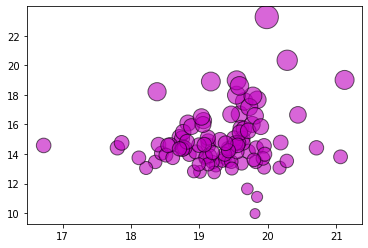

In [36]:
plt.scatter(X,Y, s=[ii**2 for ii in Y], marker='o', 
            c='m', linewidths=1, 
            alpha=0.6,
            edgecolors='k')

## shuffle samples in groups, for randomization

In [37]:
group1 = [1]*6
group2 = [2]*6
groups = group1 + group2
print(groups)

[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]


In [38]:
from random import shuffle
shuffle(groups)
print(groups)

[1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2]


## Studnet t-test

_ind means for independent samples.
For repeated measurements, one should use related or paired tests.


In [13]:
stats.ttest_ind(X,Y)

Ttest_indResult(statistic=21.981544740292673, pvalue=5.048374669994941e-55)

In [14]:
stats.pearsonr(X,Y)

(0.18036371286411723, 0.07253930542469166)

In [15]:
help(stats.pearsonr)

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Pearson correlation coefficient and p-value for testing non-correlation.
    
    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets.  The calculation of the p-value relies on the
    assumption that each dataset is normally distributed.  (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)  Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these da

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff3a7d64390>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff3a7d64a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff3a7dd9f98>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff3a7d64e48>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff3a7d6f438>,
 'means': []}

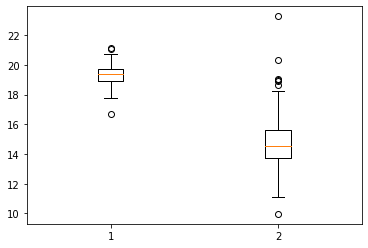

In [17]:
plt.boxplot([X,Y])

In [5]:
# Get data and have a look
data = pd.read_csv(os.path.join(INDIR + datafile), sep="\t")
print(data.shape)
data.head()

(7995, 31)


,mz,time,mz.min,mz.max,p_0hr_01_1,p_0hr_01_3,p_0hr_01_5,p_0hr_02_1,p_0hr_02_3,p_0hr_02_5,...,mock_6hr_03_5,yf_6hr_01_1,yf_6hr_01_3,yf_6hr_01_5,yf_6hr_02_1,yf_6hr_02_3,yf_6hr_02_5,yf_6hr_03_1,yf_6hr_03_3,yf_6hr_03_5
0,85.02783,59.68820,85.02783,85.02783,15.5810,16.0425,15.3953,15.4143,15.7364,15.5532,...,17.5140,17.1734,16.9813,16.6582,16.8376,16.8148,17.2885,16.5967,16.4734,16.6048
1,85.04717,124.75120,85.04709,85.04739,14.4754,14.2709,14.3696,14.7142,14.8291,14.9959,...,16.6485,16.6961,16.3596,17.0661,15.2321,15.1615,16.5655,16.4316,16.1668,16.2193
2,85.06532,68.66651,85.06517,85.06547,14.4223,15.0515,15.1241,13.5224,16.7480,14.4095,...,9.7859,14.0113,15.8681,13.3699,9.9658,15.5703,16.5537,11.9470,10.3181,10.1656
3,85.10073,16.48022,85.10050,85.10078,14.5249,13.2573,13.5206,12.9044,11.4185,12.9223,...,13.3513,13.2977,13.1140,12.5569,12.9582,12.9960,13.0290,12.4184,13.0218,13.4085
4,86.05951,67.78485,86.05949,86.05980,10.6674,17.4235,17.4510,17.0197,17.0402,16.9958,...,18.5019,17.7391,17.9262,17.6089,17.5802,17.6529,17.7841,17.3077,10.7589,17.3895


In [6]:
data.iloc[:, 4].describe()

count    7995.000000
mean       16.091406
std         3.346315
min         5.669500
25%        13.991700
50%        16.262200
75%        18.549300
max        27.773700
Name: p_0hr_01_1, dtype: float64

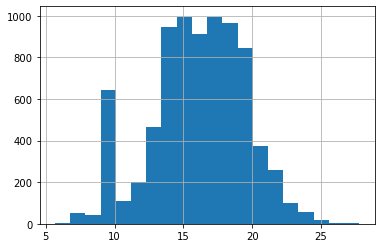

In [7]:
# Distribution of the intensity values in the first sample
# this is log2 transformed data
data.iloc[:, 4].hist(bins=20)

In [8]:
# check data in linear scale

linear_scale_data = 2**(data.iloc[:, 4])
linear_scale_data.describe()

count    7.995000e+03
mean     6.825831e+05
std      4.354430e+06
min      5.089669e+01
25%      1.629001e+04
50%      7.859773e+04
75%      3.836151e+05
max      2.294652e+08
Name: p_0hr_01_1, dtype: float64

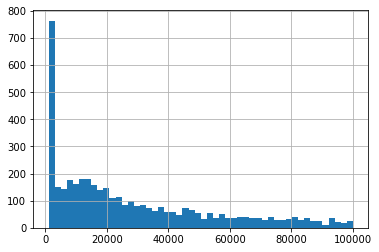

In [9]:
linear_scale_data.hist(bins=50, range=(1000,100000))

## Wrangling - reformatting data for MetaboAnalyst

In [40]:
data2 = pd.read_csv(os.path.join(INDIR + datafile_ave), sep="\t")
data2.head()

,mz,retention_time,mock_6hr_01,mock_6hr_02,mock_6hr_03,p_0hr_01,p_0hr_02,p_0hr_03,yf_6hr_01,yf_6hr_02,yf_6hr_03
0,85.02783,59,17.23,17.18,17.44,15.67,15.57,17.26,16.94,16.98,16.56
1,85.04717,124,16.53,15.80,16.62,14.37,14.85,15.63,16.71,15.65,16.27
2,85.06532,68,10.80,10.61,11.36,14.87,14.89,12.53,14.42,14.03,10.81
3,85.10073,16,13.32,13.16,13.42,13.77,12.42,13.31,12.99,12.99,12.95
4,86.05951,67,18.42,18.15,18.37,15.18,17.02,17.91,17.76,17.67,15.15


In [ ]:
# format wanted for MetaboAnalyst
Sample	ko15	ko16	ko18	ko19	ko21	ko22	wt15	wt16	wt18	wt19	wt21	wt22
Label	KO	KO	KO	KO	KO	KO	WT	WT	WT	WT	WT	WT
200.1/2926	147887.53	451600.71	65290.38	56540.93	85146.33	162012.44	175177.08	82619.48	51951.61	69198.22	153273.47	98144.28
205/2791	1778569	1567038	1482796	1039130	1223132	1072038	1950287	1466781	1572679	1275313	1356014	1231442
206/2791	237993.6	269714	201393.4	150107.3	176989.7	156797	276541.8	222366.2	211717.7	186850.9	188285.9	172348.8


In [43]:
data2.columns[2:]

Index(['mock_6hr_01', 'mock_6hr_02', 'mock_6hr_03', 'p_0hr_01', 'p_0hr_02',
       'p_0hr_03', 'yf_6hr_01', 'yf_6hr_02', 'yf_6hr_03'],
      dtype='object')

In [45]:
s = 'Sample\t' + '\t'.join(data2.columns[2:]) + '\n'
s += 'Label\t' + '\t'.join(x.split('_')[0] for x in data2.columns[2:]) + '\n'
for line in data2.values:
    s += '@'.join([str(line[0]), str(line[1])]) + '\t' + '\t'.join(
    [str(x) for x in line[2:]]) + '\n'
    
with open('use_MetaboAnalyst_ave_log2_modc_ae_2012.txt', 'w') as O:
    O.write(s)